In [1]:
!pip install textblob

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')  # WordNet for additional NLP tasks
nltk.download('wordnet')  # WordNet corpus
nltk.download('averaged_perceptron_tagger')  # POS tagging

# Try this if there's an issue with tokenization:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob

In [4]:
df = pd.read_csv("blogs (1).csv")
df.rename(columns={"Data": "Text", "Labels": "Category"}, inplace=True)


In [12]:
df

,Text,Category
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
# Data Exploration
print(df.head())
print(df.info())
print(df['Category'].value_counts())

                                                Text     Category
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2000 non-null   object
 1   Category  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Category
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci

In [6]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return " ".join(tokens)

nltk.download('punkt')
nltk.download('stopwords')
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sschp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Category']

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Naive Bayes Classification
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [12]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8275
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.80      0.95      0.87        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.9

In [11]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [18]:
df['Sentiment'] = df['Text'].apply(get_sentiment)
print(df[['Category', 'Sentiment']].groupby('Category').value_counts())

Category                  Sentiment
alt.atheism               Positive     77
                          Negative     23
comp.graphics             Positive     76
                          Negative     24
comp.os.ms-windows.misc   Positive     78
                          Negative     22
comp.sys.ibm.pc.hardware  Positive     80
                          Negative     20
comp.sys.mac.hardware     Positive     76
                          Negative     24
comp.windows.x            Positive     73
                          Negative     27
misc.forsale              Positive     84
                          Negative     16
rec.autos                 Positive     83
                          Negative     17
rec.motorcycles           Positive     74
                          Negative     26
rec.sport.baseball        Positive     71
                          Negative     29
rec.sport.hockey          Positive     66
                          Negative     34
sci.crypt                 Positive     8

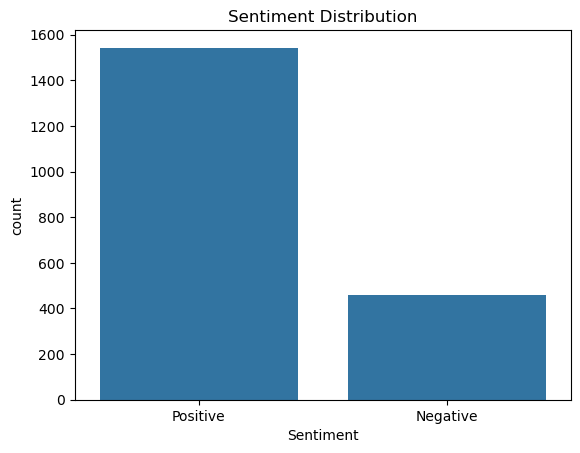

In [19]:
# Summary Plot
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()
